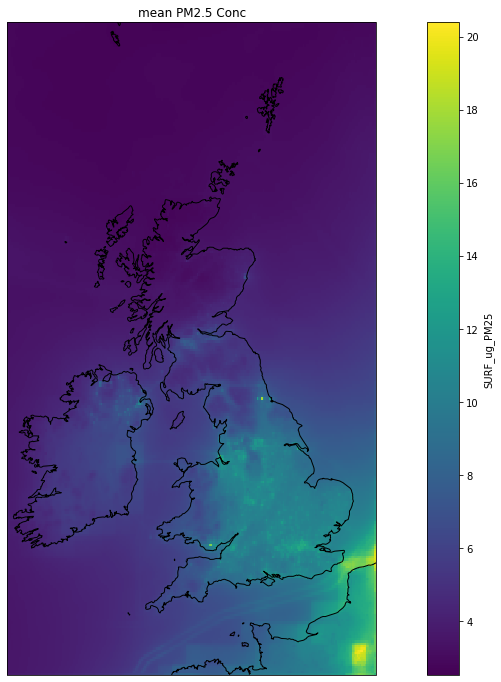

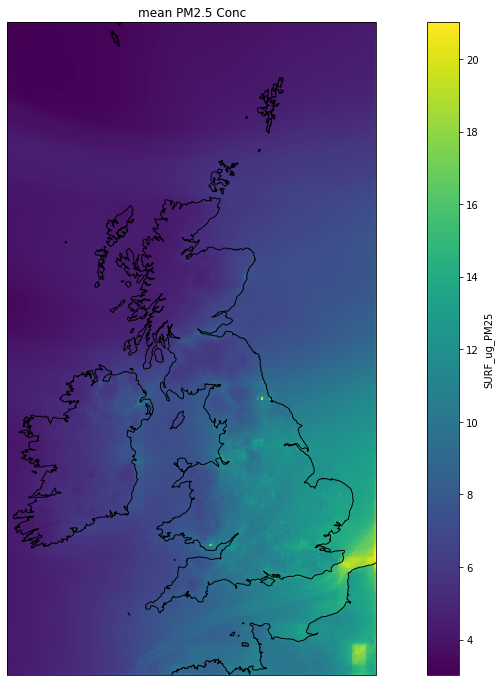

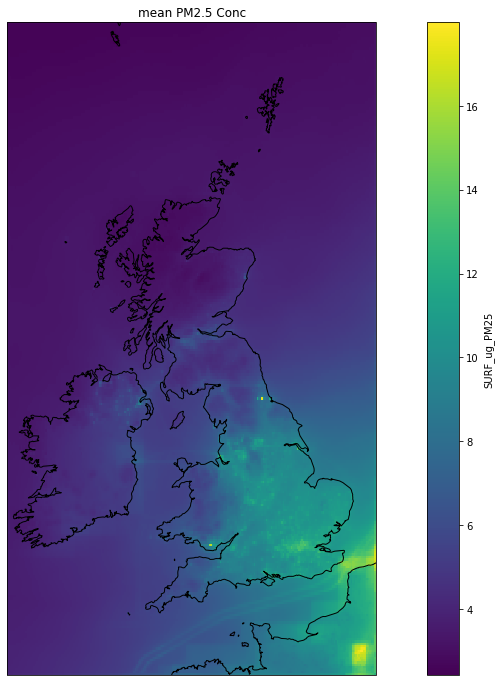

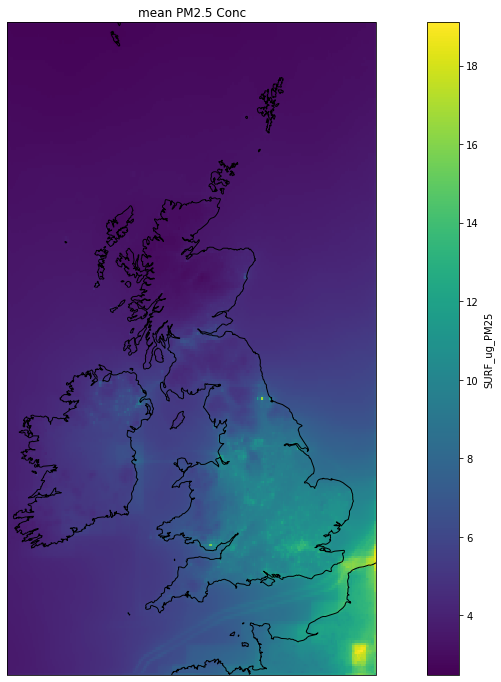

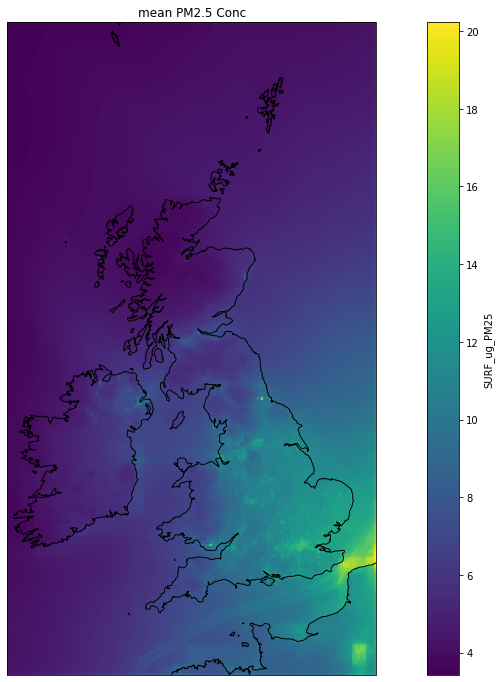

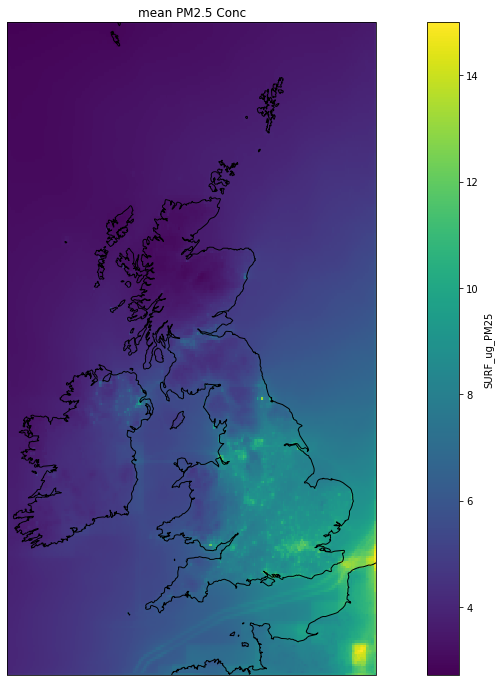

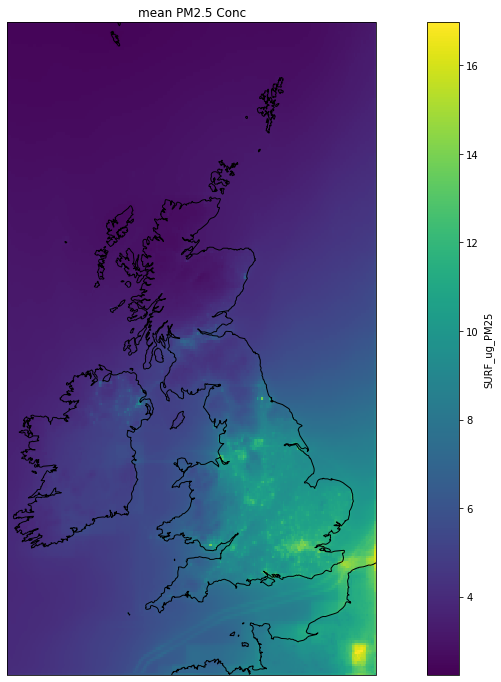

In [28]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from ipywidgets import interactive
import matplotlib as mpl
from matplotlib.cm import get_cmap
from matplotlib.colors import from_levels_and_colors
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import (OCEAN, LAKES, BORDERS, COASTLINE, RIVERS, COLORS,
                             LAND)
from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords)
from wrf import (getvar, to_np, vertcross, smooth2d, CoordPair, GeoBounds,
                 get_cartopy, latlon_coords, cartopy_xlim, cartopy_ylim)
from wrf import getvar, interplevel, to_np, get_basemap, latlon_coords

# I am sure there is a far more efficient way of doing all of the following, so I'm trying to figure it out
file2010 = r'C:\Users\conno\OneDrive\Documents\pythonstuff\EMEP\EMEP4UK_rv4.17_WRF3.7.1_CEHLAND_EU_to_UK_trend2010_emiss2010_UK_2010_day_PM25.nc'
file2011 = r'C:\Users\conno\OneDrive\Documents\pythonstuff\EMEP\EMEP4UK_rv4.17_WRF3.7.1_CEHLAND_EU_to_UK_trend2011_emiss2011_UK_2011_day_PM25.nc'
file2012 = r'C:\Users\conno\OneDrive\Documents\pythonstuff\EMEP\EMEP4UK_rv4.17_WRF3.7.1_CEHLAND_EU_to_UK_trend2012_emiss2012_UK_2012_day_PM25.nc'
file2013 = r'C:\Users\conno\OneDrive\Documents\pythonstuff\EMEP\EMEP4UK_rv4.17_WRF3.7.1_CEHLAND_EU_to_UK_trend2013_emiss2013_UK_2013_day_PM25.nc'
file2014 = r'C:\Users\conno\OneDrive\Documents\pythonstuff\EMEP\EMEP4UK_rv4.17_WRF3.7.1_CEHLAND_EU_to_UK_trend2014_emiss2014_UK_2014_day_PM25.nc'
file2015 = r'C:\Users\conno\OneDrive\Documents\pythonstuff\EMEP\EMEP4UK_rv4.17_WRF3.7.1_CEHLAND_EU_to_UK_trend2015_emiss2015_UK_2015_day_PM25.nc'
file2016 = r'C:\Users\conno\OneDrive\Documents\pythonstuff\EMEP\EMEP4UK_rv4.17_WRF3.7.1_CEHLAND_EU_to_UK_trend2016_emiss2015_UK_2016_day_PM25.nc'# name does not follow pattern - unsure why

ds2010 = xr.open_dataset(file2010)
ds2011 = xr.open_dataset(file2011)
ds2012 = xr.open_dataset(file2012)
ds2013 = xr.open_dataset(file2013)
ds2014 = xr.open_dataset(file2014)
ds2015 = xr.open_dataset(file2015)
ds2016 = xr.open_dataset(file2016)
pm2010 = ds2010['SURF_ug_PM25']
pm2011 = ds2011['SURF_ug_PM25']
pm2012 = ds2012['SURF_ug_PM25']
pm2013 = ds2013['SURF_ug_PM25']
pm2014 = ds2014['SURF_ug_PM25']
pm2015 = ds2015['SURF_ug_PM25']
pm2016 = ds2016['SURF_ug_PM25']
pm25_2010 = pm2010.mean(dim = 'time') #mean pm 2.5 over entire year
pm25_2011 = pm2011.mean(dim = 'time')
pm25_2012 = pm2012.mean(dim = 'time')
pm25_2013 = pm2013.mean(dim = 'time')
pm25_2014 = pm2014.mean(dim = 'time')
pm25_2015 = pm2015.mean(dim = 'time')
pm25_2016 = pm2016.mean(dim = 'time')

pm25results = [pm25_2010, pm25_2011, pm25_2012, pm25_2013, pm25_2014, pm25_2015, pm25_2016]

for pm in pm25results:
    fig = plt.figure (figsize = (18, 12))
    ax =plt.axes(projection = ccrs.Mercator(central_longitude = 1.96)) 
    ax.coastlines()
    ax.set_extent([-10.7,2.6,48.5,61.8]) 
    pm.plot(transform=ccrs.PlateCarree()) 
    plt.title ('mean PM2.5 Conc')
    plt.show

#fig = plt.figure (figsize = (18, 12)) # this bit works for plotting one year, so just turning it into comments in case trying to do multiple doesn't work
#ax =plt.axes(projection = ccrs.Mercator(central_longitude = 1.96)) 
#ax.coastlines()
#ax.set_extent([-10.7,2.6,48.5,61.8]) 
#pm25_2010.plot(transform=ccrs.PlateCarree()) 
#plt.title ('mean PM2.5 Conc 2010')
#plt.show